In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv('datasets\medical-charges.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\hrida\AppData\Local\Temp\ipykernel_26304\387943773.py:1: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv('datasets\medical-charges.csv')


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


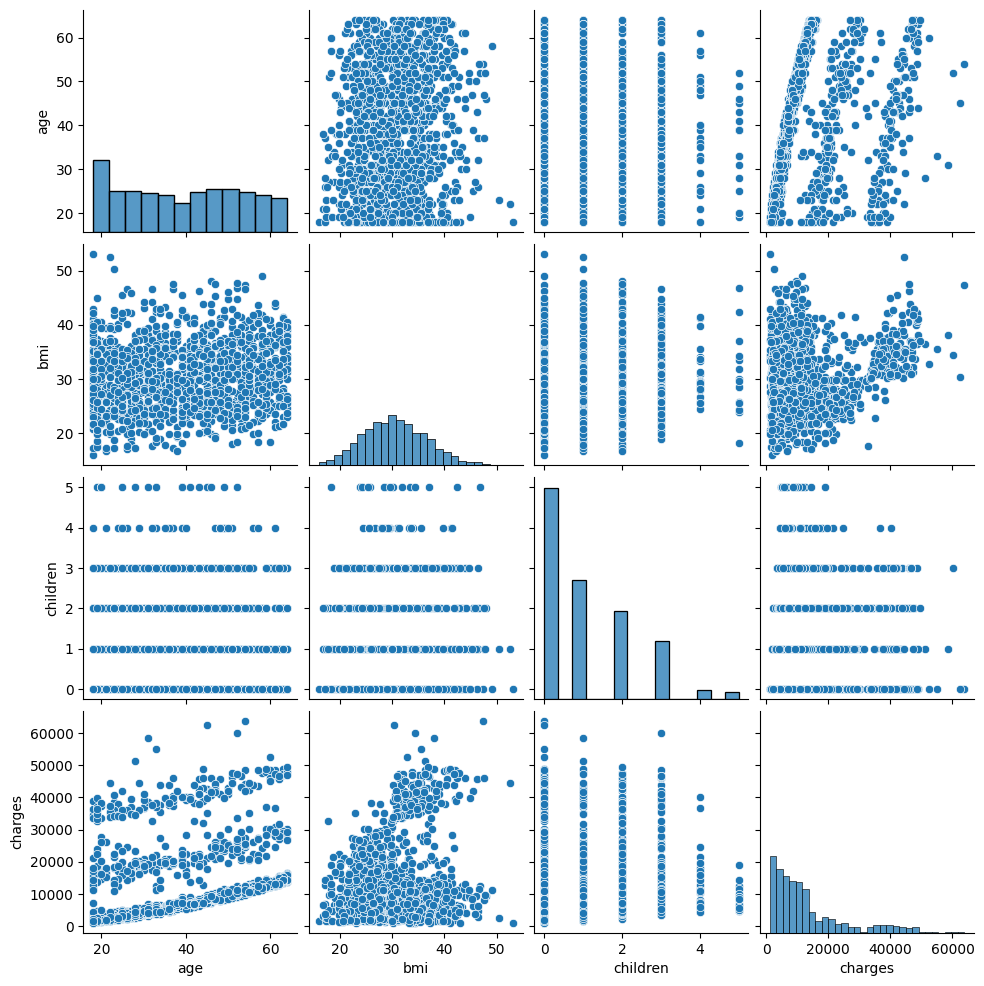

In [5]:
sns.pairplot(df)
plt.show()

In [6]:
fig = px.histogram(df, x='age', marginal='box', nbins=47, title="distribution of age")
fig.update_layout( bargap=0.1)
fig.show()

In [7]:
fig = px.histogram(df, x='bmi', marginal='box', nbins=47, title="distribution of bmi", color_discrete_sequence=['red'])
fig.update_layout( bargap=0.1)
fig.show()

In [8]:
fig = px.histogram(df, x='charges', marginal='box', nbins=47, title="distribution of charges", color='smoker')
fig.update_layout( bargap=0.1)
fig.show()

In [9]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [10]:
px.histogram(df, x='smoker', color='sex', barmode='group', title='sex vs smoker')

In [11]:
fig = px.scatter(df, x='age', y='charges', title="dage vs charges", opacity=0.8,hover_data=['sex'], color='smoker')
fig.update_traces( marker_size=5)
fig.show()

In [12]:
fig = px.scatter(df, x='bmi', y='charges', title="dage vs charges", opacity=0.8,hover_data=['sex'], color='smoker')
fig.update_traces( marker_size=5)
fig.show()

In [13]:
px.violin(x=df['children'],y=df['charges'])

In [14]:
smoker_value = {'yes':1,'no':0}
smoker_num = df.smoker.map(smoker_value)
smoker_num.head(), df.smoker.head()

(0    1
 1    0
 2    0
 3    0
 4    0
 Name: smoker, dtype: int64,
 0    yes
 1     no
 2     no
 3     no
 4     no
 Name: smoker, dtype: object)

In [15]:
df.charges.corr(smoker_num)

0.7872514304984782

In [16]:
df.charges.corr(df.children)

0.06799822684790469

In [17]:
df.charges.corr(df.age)

0.2990081933306476

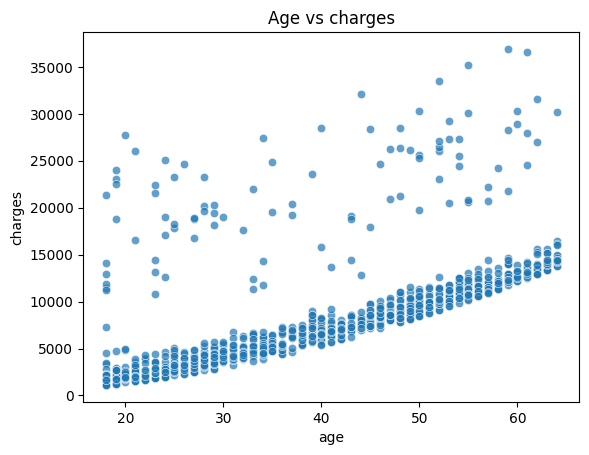

In [18]:
non_smoker = df[df.smoker == 'no']
sns.scatterplot(x='age',y='charges',data=non_smoker, alpha = 0.7)
plt.title('Age vs charges')
plt.show()

In [50]:
def estimate_charges(age, w,b):
    return (w)*(age)+(b)

estimate_charges(30, 60,100)

1900

In [51]:
w = 60
b = 100

age_ns = non_smoker.age
estimate_charges = estimate_charges(age_ns, 60,100)

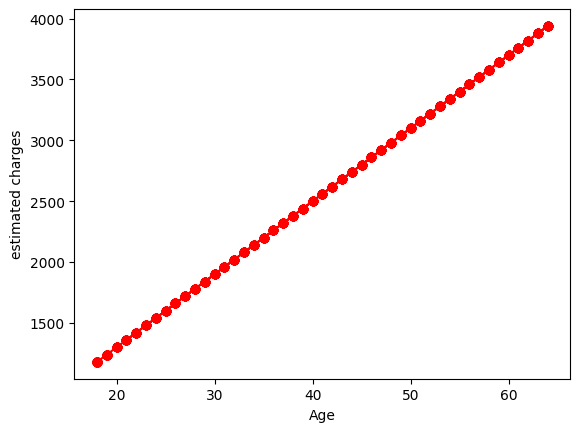

In [52]:
plt.plot(age_ns, estimate_charges, 'r-o')
plt.xlabel('Age')
plt.ylabel('estimated charges')
plt.show()

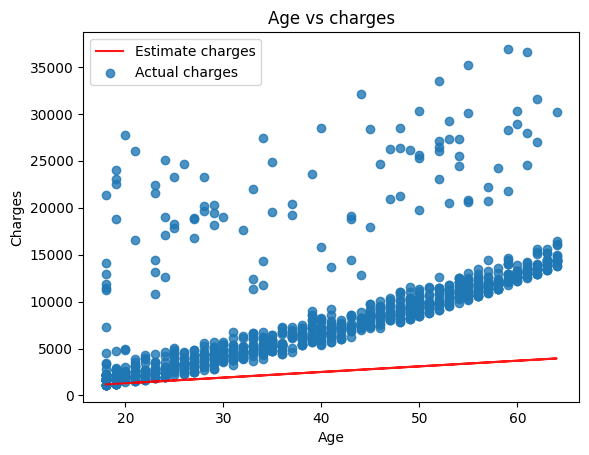

In [53]:
target = non_smoker.charges

plt.plot(age_ns,estimate_charges,'r', alpha=0.9)
plt.scatter(age_ns,target, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs charges')
plt.legend(['Estimate charges', 'Actual charges'])
plt.show()

In [55]:
def try_parameters(w,b):

    estimate_charges = estimate_charges(age_ns,w,b)

    plt.plot(age_ns,estimate_charges,'r', alpha=0.9)
    plt.scatter(age_ns,target, alpha=0.8, s=8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.title('Age vs charges')
    plt.legend(['Estimate charges', 'Actual charges'])
    plt.show()

In [56]:
try_parameters(60,100)

UnboundLocalError: cannot access local variable 'estimate_charges' where it is not associated with a value